# Computer Vision
**Image Corner Processing : Assignment Week 5**


**A. Given the image “strawberries.tif”. Process the image and show only edible part of
strawberry.**


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')  

Mounted at /content/gdrive


In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy
plt.rcParams['figure.figsize'] = [8, 8]

In [20]:
path="/content/gdrive/MyDrive/ComputerVision/strawberries.tif"
image = cv2.imread(path)
result = image.copy()
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# lower boundary RED color range values; Hue (0 - 10)
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])
# upper boundary RED color range values; Hue (160 - 180)
lower2 = np.array([160,100,20])
upper2 = np.array([179,255,255])

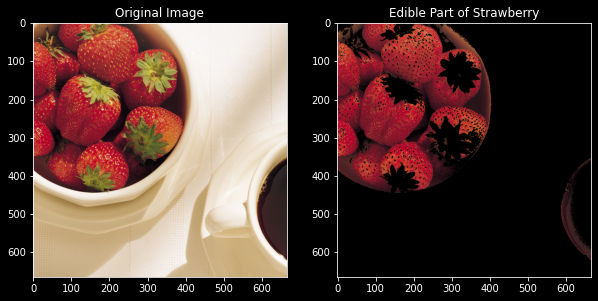

In [21]:
lower_mask = cv2.inRange(image, lower1, upper1)
upper_mask = cv2.inRange(image, lower2, upper2)
full_mask = lower_mask + upper_mask;
result = cv2.bitwise_and(result, result, mask=full_mask)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [10, 10]
f, axarr = plt.subplots(1,2)
axarr[0].imshow(rgb_img)
axarr[0].title.set_text("Original Image")
axarr[1].imshow(result)
axarr[1].title.set_text("Edible Part of Strawberry")


**B. Given the image ‘polygon.png’, find all the polygons in the image, and for each polygon
detect the number and location of vertices (corners). Given notebook ‘week5-B.ipynb’.
Note: You need to apply cv2.connectedComponents twice: once for separating each shape,
lower_mask = cv2.inRange(image, lower1, upper1)
upper_mask = cv2.inRange(image, lower2, upper2)
full_mask = lower_mask + upper_mask;
result = cv2.bitwise_and(result, result, mask=full_mask)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [10, 10]
f, axarr = plt.subplots(1,2)
axarr[0].imshow(rgb_img)
axarr[0].title.set_text("Original Image")
axarr[1].imshow(result)
axarr[1].title.set_text("Edible Part of Strawberry")
plt show()
and once for detecting the corners of each shape. Change the parameter window_size (and
possibly other parameters) in the Harris corner detector until you get the correct result.**

In [5]:
path2="/content/gdrive/MyDrive/ComputerVision/polygon.png"
I = cv2.imread(path2)
G = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)


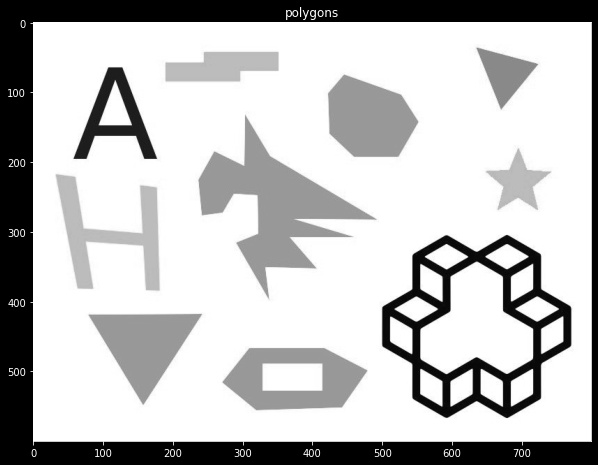

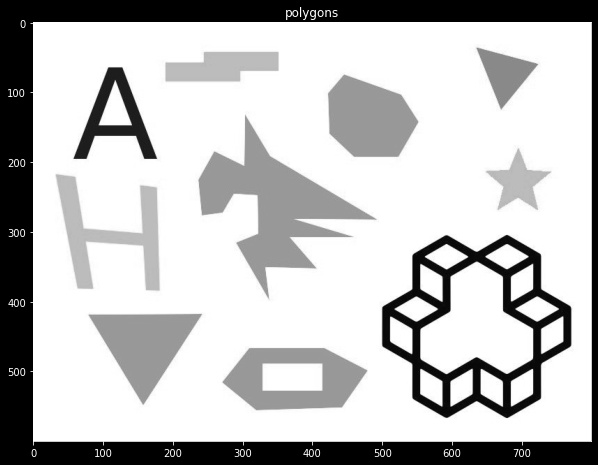

In [7]:
plt.imshow(G, cmap=plt.cm.gray)
plt.title("polygons")
plt.show()


In [8]:
ret, T = cv2.threshold(G,220,255,cv2.THRESH_BINARY_INV)
nc,CC = cv2.connectedComponents(T)

In [9]:
nc,CC

(11, array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32))

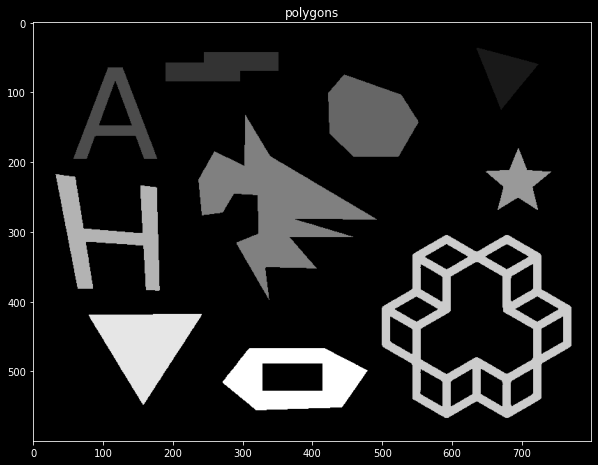

In [10]:
plt.imshow(CC, cmap=plt.cm.gray)
plt.title("polygons")
plt.show()

In [13]:
def find_corners(G):
     G = np.float32(G)
     window_size = 9 #Neighborhood size used when computing the matrix M
     soble_kernel_size = 3 # kernel size for gradients Aperture parameter for the Sobel operator
     alpha = 0.03 # Harris detector free parameter in the score equation
     H_ = cv2.cornerHarris(G, window_size, soble_kernel_size, alpha)
     # normalize C so that the maximum value is 1
     H = H_ / H_.max()
     C = np.uint8(H > 0.005) * 255
     ## connected components
     nc,CC = cv2.connectedComponents(C)
     return H_, nc

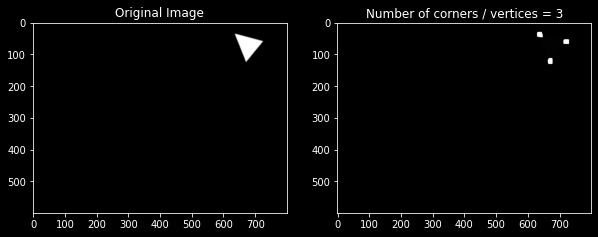

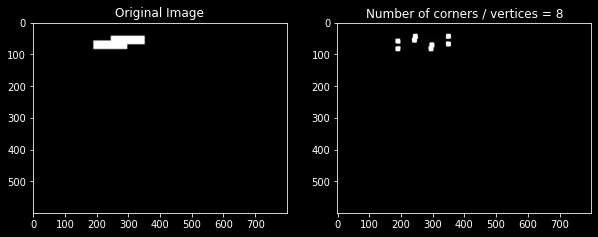

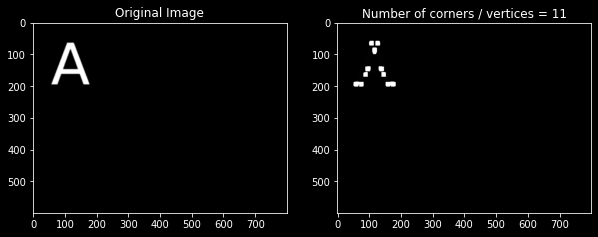

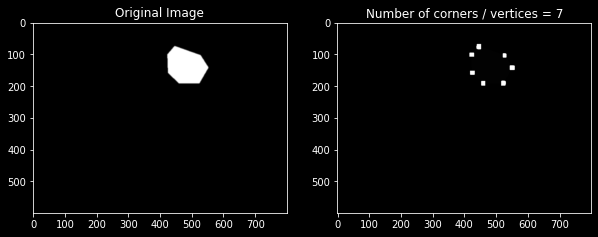

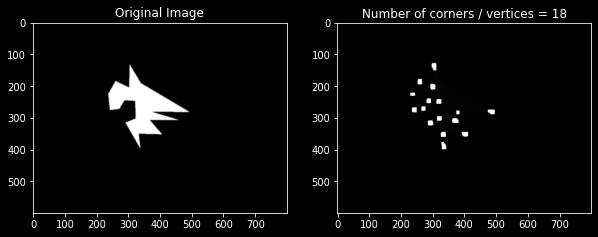

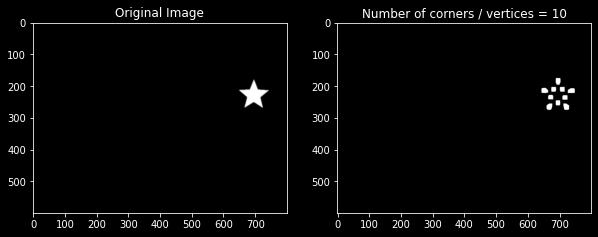

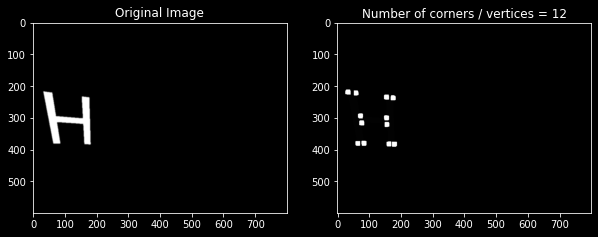

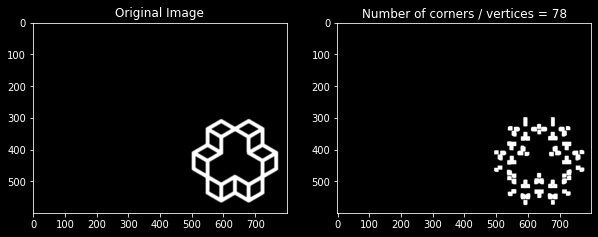

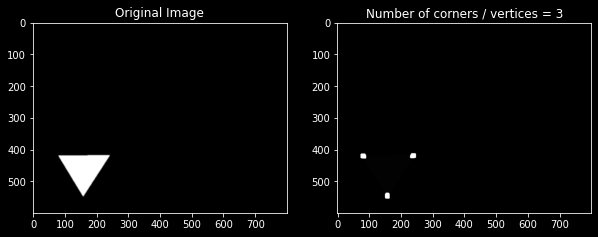

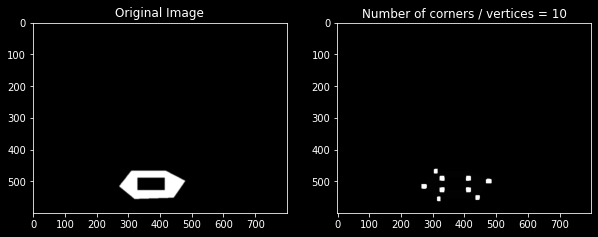

In [26]:
for k in range(1,nc):
    plt.rcParams['figure.figsize'] = [10, 10]
    Ck = np.zeros(T.shape, dtype=np.float32)
    Ck[CC == k] = 1;
    Ck = cv2.GaussianBlur(Ck,(5,5),0)
    font = cv2.FONT_HERSHEY_SIMPLEX
    bin_uint8 = (Ck * 255).astype(np.uint8)
    dst, nc = find_corners(bin_uint8)
    dst = cv2.dilate(dst, np.ones((8, 8), np.uint8), iterations=1)
    o_img = copy.deepcopy(Ck)
    Ck[dst > 0.07 * dst.max()]=[100]
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(o_img, cmap=plt.cm.gray)
    axarr[0].title.set_text("Original Image")
    axarr[1].imshow(Ck, cmap=plt.cm.gray)
    axarr[1].title.set_text("Number of corners / vertices = " + str(nc-1))
    plt.show()
    